ACTIVE SHAPE MODEL- ASSIGNMENT-1- 22BM6JP09

TRACING AND ORDERING THE POINTS

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import imutils
img = cv2.imread(r".\My hand.jpeg")
hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8") 
skinRegionHSV = cv2.inRange(hsvim, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
font = cv2.FONT_HERSHEY_COMPLEX 
canvas = np.ones((600,600,3))

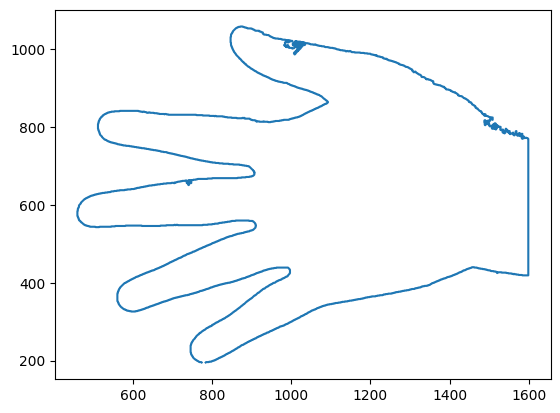

In [2]:
x = contours[:,:,0]
y = contours[:,:,1]
plt.plot(x,y)

SPLIT AND MERGE ALGORITHM- FINDING THE LANDMARK POINTS. 

In [3]:
control_x = []
control_y = []
control_x.append(x[0])
control_y.append(y[0])
for i,j in zip(range(0,len(x)-25,25),range(0,len(y)-25,25)):
    current_x = x[i]
    current_y = y[j]
    next_x = x[i+25]
    next_y = x[j+25]
    # line -> ax+by+c=0
    if next_x-current_x == 0:
        a=0
        b=1
        c=0
    else:
        a = (next_y-current_y)/(next_x-current_x)
        b = -1
        c = current_y - (a*current_x)
    # distance -> d = |ax_i+by_i+c|/root(a^2+b^2)
    for k in range(1,24):
        x_i = x[i+k]
        y_i = y[j+k]
        d = np.abs(a*x_i+b*y_i+c)/(np.sqrt(a**2+b**2))
        if d>15:
            control_x.append(x_i)
            control_y.append(y_i)
            break

In [4]:
print("The number of points in the hand reduced from", len(x), "to", len(control_x))

The number of points in the hand reduced from 2725 to 96


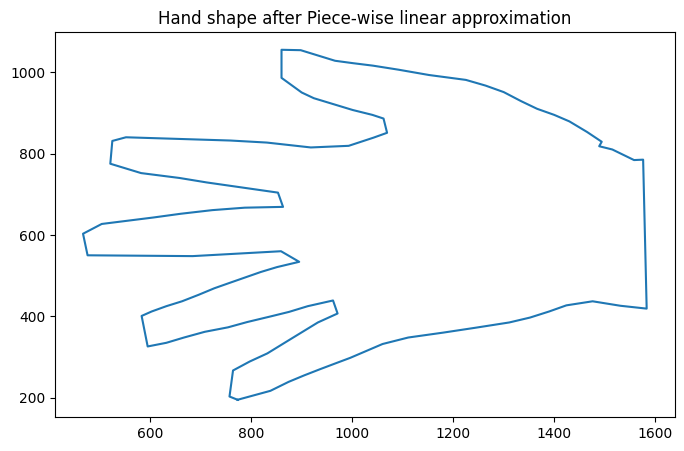

In [5]:
points=list(zip(control_x,control_y))
points.append(points[0])
pts= np.array(points)
plt.figure(figsize=(8,5))
plt.plot(pts[:,0],pts[:,1])
plt.title("Hand shape after Piece-wise linear approximation")
plt.show()


PRINCIPAL COMPONENT ANALYSIS

DEFINING MOTHER SHAPE

In [6]:
mother_SHAPE = np.reshape(pts[1:],newshape=(len(pts[1:])*2,1))

In [7]:
mother_SHAPE.shape 

(192, 1)

ADDING NOISE TO THE LANDMARK POINTS

In [8]:
def getNoise():
    noise = np.array([ np.random.choice([-0.4,0.4,0.2,-0.2,0.1,-0.1]) * np.random.choice(10)/5 for i in range(len(mother_SHAPE))])
    return np.reshape(noise,newshape=(192,1))

In [9]:
getNoise().shape

(192, 1)

In [10]:
hand_vectors = mother_SHAPE.copy()
for i in range(49):
    vector = mother_SHAPE + getNoise()
    hand_vectors = np.append(hand_vectors,vector,axis=1)
hand_vectors.shape

(192, 50)

FINDING MEAN OF THESE 50 VECTORS

In [11]:
mean_shape = np.reshape(np.average(hand_vectors,axis=1),newshape=(hand_vectors.shape[0],1))
mean_shape.shape

(192, 1)

COMPUTING THE COVARIANCE MATRIX

In [12]:
covariance_matrix = np.cov(hand_vectors)
covariance_matrix.shape

(192, 192)

In [13]:
eigen_vals,eigen_vectors = np.linalg.eigh(covariance_matrix)
print("Eigen vectors -> {}, Eigen Values -> {}".format(eigen_vectors.shape, eigen_vals.shape))

Eigen vectors -> (192, 192), Eigen Values -> (192,)


In [14]:
signif_eigen_vectors, signif_eigen_vals = np.reshape(eigen_vectors[-i:],newshape=(192,i)), np.reshape(eigen_vals[-i:],newshape=(i,1))
print("Eigen vectors -> {}, Eigen Values -> {}".format(signif_eigen_vectors.shape, signif_eigen_vals.shape))

Eigen vectors -> (192, 48), Eigen Values -> (48, 1)


GENERATING SYNTHETIC SHAPES USING THE MODEL

In [15]:
B = [4,8,12,16,20,24]
shapes = []
for b in B:
    shape = mean_shape + np.matmul(signif_eigen_vectors, b * np.sqrt(signif_eigen_vals))
    shape = shape.reshape(96,2)
    shapes.append(shape)

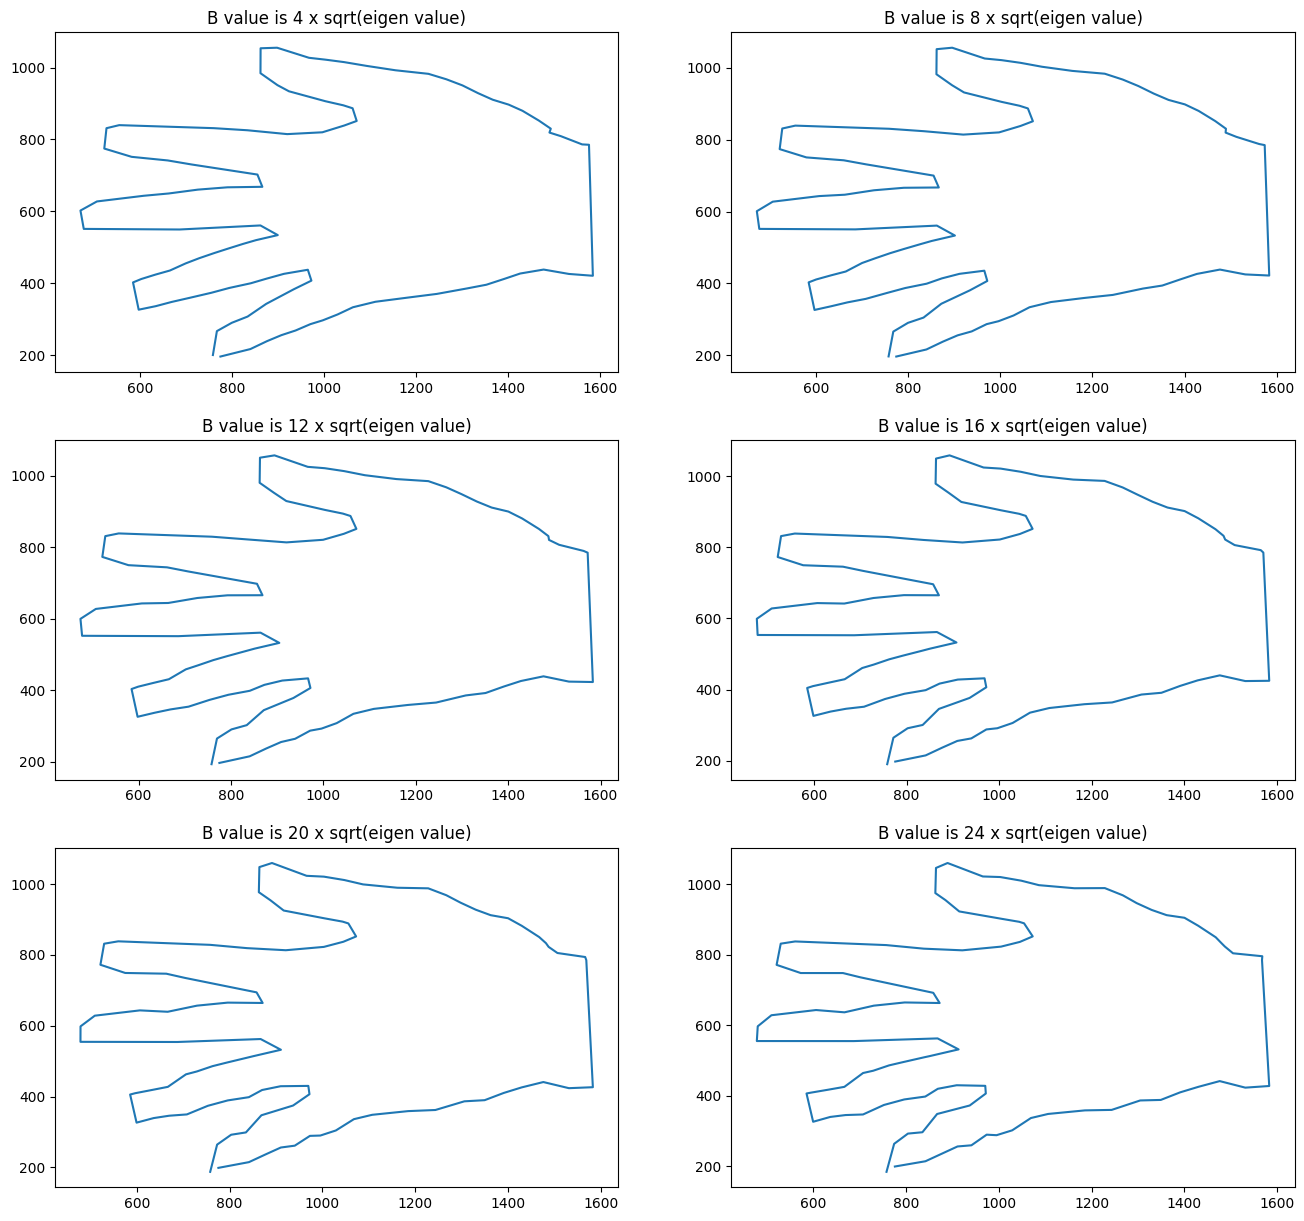

In [16]:
plt.figure(figsize=(16,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.plot(shapes[i][:,0],shapes[i][:,1])
    plt.title("B value is "+str(B[i])+" x sqrt(eigen value)")

plt.show()